In [3]:
# must insert this statement to render the plots within the notebook
# this is specific to the ipython notebook
%matplotlib inline

# -------------------------------------------------------------------------------------------------------
# netcdf/numpy/xray/stats
import numpy as np
from datetime import datetime, timedelta
import pandas as pd
import xarray as xr
from scipy.stats.stats import pearsonr

# -------------------------------------------------------------------------------------------------------
# OS interaction
import sys, pickle, os

# -------------------------------------------------------------------------------------------------------
# plotting packages
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context('poster')
import matplotlib
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap

# -------------------------------------------------------------------------------------------------------
# Custom packages
import solargeo
import kgraph
import turbpy
import turbpy.multiConst as mc

# -------------------------------------------------------------------------------------------------------
# Directory Lists
# -------------------------------------------------------------------------------------------------------
# Unix
if 'linux' in sys.platform:
    dir_pre = '/home/lapok/gdrive/'
# Mac
elif 'darwin' in sys.platform:
    dir_pre = '/Users/karllapo/gdrive/'

dirProj = dir_pre+'SnowHydrology/proj/TurbulenceFeedbacks/'  # Project directory
dirPrint = dir_pre+'SnowHydrology/proj/TurbulenceFeedbacks/Graphics'  # Directory for printing figures

# Try to read the Northern Hemisphere SCE data

In [5]:
os.chdir(dirProj + 'data')
sce = xr.open_dataset('nhsce_v01r01_19661004_20160905.nc')

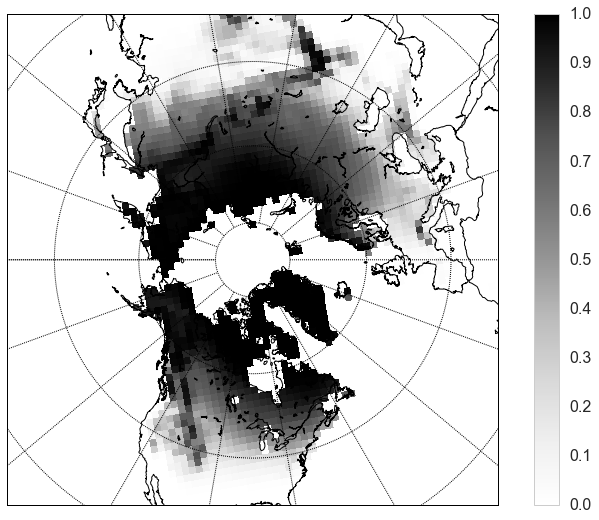

In [24]:
# setup north polar stereographic basemap.
# The longitude lon_0 is at 6-o'clock, and the
# latitude circle boundinglat is tangent to the edge
# of the map at lon_0. Default value of lat_ts
# (latitude of true scale) is pole.
m = Basemap(projection='npstere', boundinglat=30, lon_0=270, resolution='l')
m.drawcoastlines()
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary()
# draw tissot's indicatrix to show distortion.
ax = plt.gca()
m.pcolor(sce.longitude.values, sce.latitude.values,
         sce.snow_cover_extent.sel(time=((sce['time.month'] > 10) |
                                         (sce['time.month'] < 6))).mean(dim='time').values,
         latlon=True)
plt.colorbar()
plt.show()

# ERA Interim Surface Values

In [27]:
os.chdir(dirProj + 'data')
era = xr.open_dataset('ERAInterim.surfStabParams.nc')

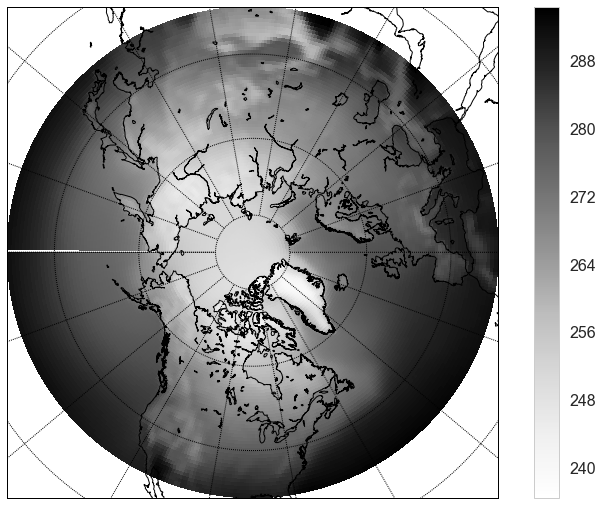

In [40]:
# setup north polar stereographic basemap.
# The longitude lon_0 is at 6-o'clock, and the
# latitude circle boundinglat is tangent to the edge
# of the map at lon_0. Default value of lat_ts
# (latitude of true scale) is pole.
m = Basemap(projection='npstere', boundinglat=30, lon_0=270, resolution='l')
m.drawcoastlines()
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary()
# draw tissot's indicatrix to show distortion.
ax = plt.gca()
lon, lat = np.meshgrid(era.longitude.values, era.latitude.values)
m.pcolor(lon, lat,
         era.t2m.sel(time=((era['time.month'] > 10) | (era['time.month'] < 6))).mean(dim='time').values,
         latlon=True)
plt.colorbar()
plt.show()

<xarray.Dataset>
Dimensions:    (latitude: 81, longitude: 480, time: 1824)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.25 -178.5 -177.75 -177.0 ...
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 87.0 86.25 85.5 ...
  * time       (time) datetime64[ns] 1979-01-01 1979-01-01T06:00:00 ...
Data variables:
    t2m        (time, latitude, longitude) float64 242.5 242.5 242.5 242.5 ...
    si10       (time, latitude, longitude) float64 5.628 5.628 5.628 5.628 ...
    skt        (time, latitude, longitude) float64 242.6 242.6 242.6 242.6 ...
Attributes:
    Conventions: CF-1.6
    history: 2017-02-03 21:06:24 GMT by grib_to_netcdf-2.0.2: grib_to_netcdf /data/data01/scratch/_mars-atls20-95e2cf679cd58ee9b4db4dd119a05a8d-gUWOUX.grib -o /data/data01/scratch/_grib2netcdf-atls20-95e2cf679cd58ee9b4db4dd119a05a8d-EAyb6y.nc -utime

In [39]:
era.t2m.sel(time=((era['time.month'] > 10) | (era['time.month'] < 6))).mean(dim='time').values.shape

(81, 480)

In [37]:
era

<xarray.Dataset>
Dimensions:    (latitude: 81, longitude: 480, time: 1824)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.25 -178.5 -177.75 -177.0 ...
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 87.0 86.25 85.5 ...
  * time       (time) datetime64[ns] 1979-01-01 1979-01-01T06:00:00 ...
Data variables:
    t2m        (time, latitude, longitude) float64 242.5 242.5 242.5 242.5 ...
    si10       (time, latitude, longitude) float64 5.628 5.628 5.628 5.628 ...
    skt        (time, latitude, longitude) float64 242.6 242.6 242.6 242.6 ...
Attributes:
    Conventions: CF-1.6
    history: 2017-02-03 21:06:24 GMT by grib_to_netcdf-2.0.2: grib_to_netcdf /data/data01/scratch/_mars-atls20-95e2cf679cd58ee9b4db4dd119a05a8d-gUWOUX.grib -o /data/data01/scratch/_grib2netcdf-atls20-95e2cf679cd58ee9b4db4dd119a05a8d-EAyb6y.nc -utime